# Titanic Competition

In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [20]:
# Importar data

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('gender_submission.csv')

# Exploratory Data Analysis

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Dimentions

In [22]:
print(f"Shapes: [Train: {train.shape}, Test: {test.shape}, Submission: {sub.shape}]")

Shapes: [Train: (891, 12), Test: (418, 11), Submission: (418, 2)]


## Data Information

## train.info()

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Notice:
- We can see that there is some missing values in the data. So we have to handle it later.

In [25]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Ploting libraries

In [26]:
from matplotlib import pyplot as plt
import seaborn as sns

# Male vs Female in dataset

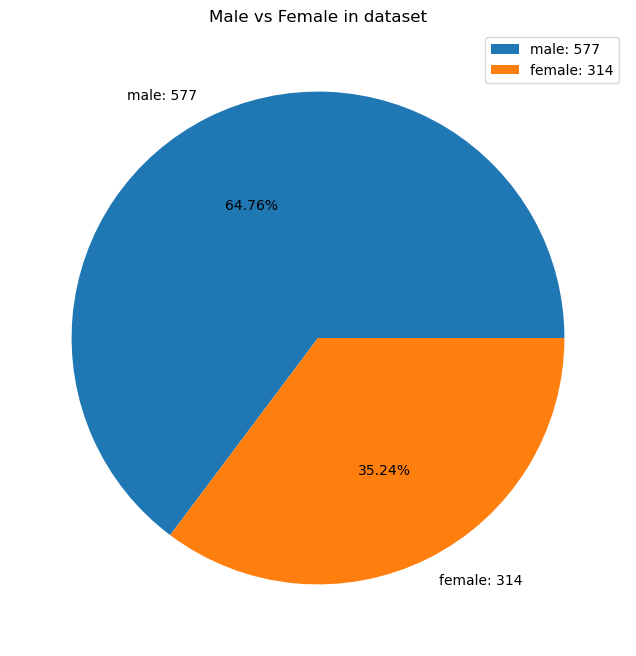

In [27]:
female = train['Sex'].value_counts()[1]
male = train['Sex'].value_counts()[0]
plt.figure(figsize=(8, 8))
plt.pie([male, female],labels=['male: '+str(male), 'female: '+str(female)], autopct="%.2f%%")
plt.title("Male vs Female in dataset")
plt.legend()
plt.show()

Notice:
- The number of males is larger than females which is normal because just the number of sailors on the titanic was big.

## Distrabution of the data¶

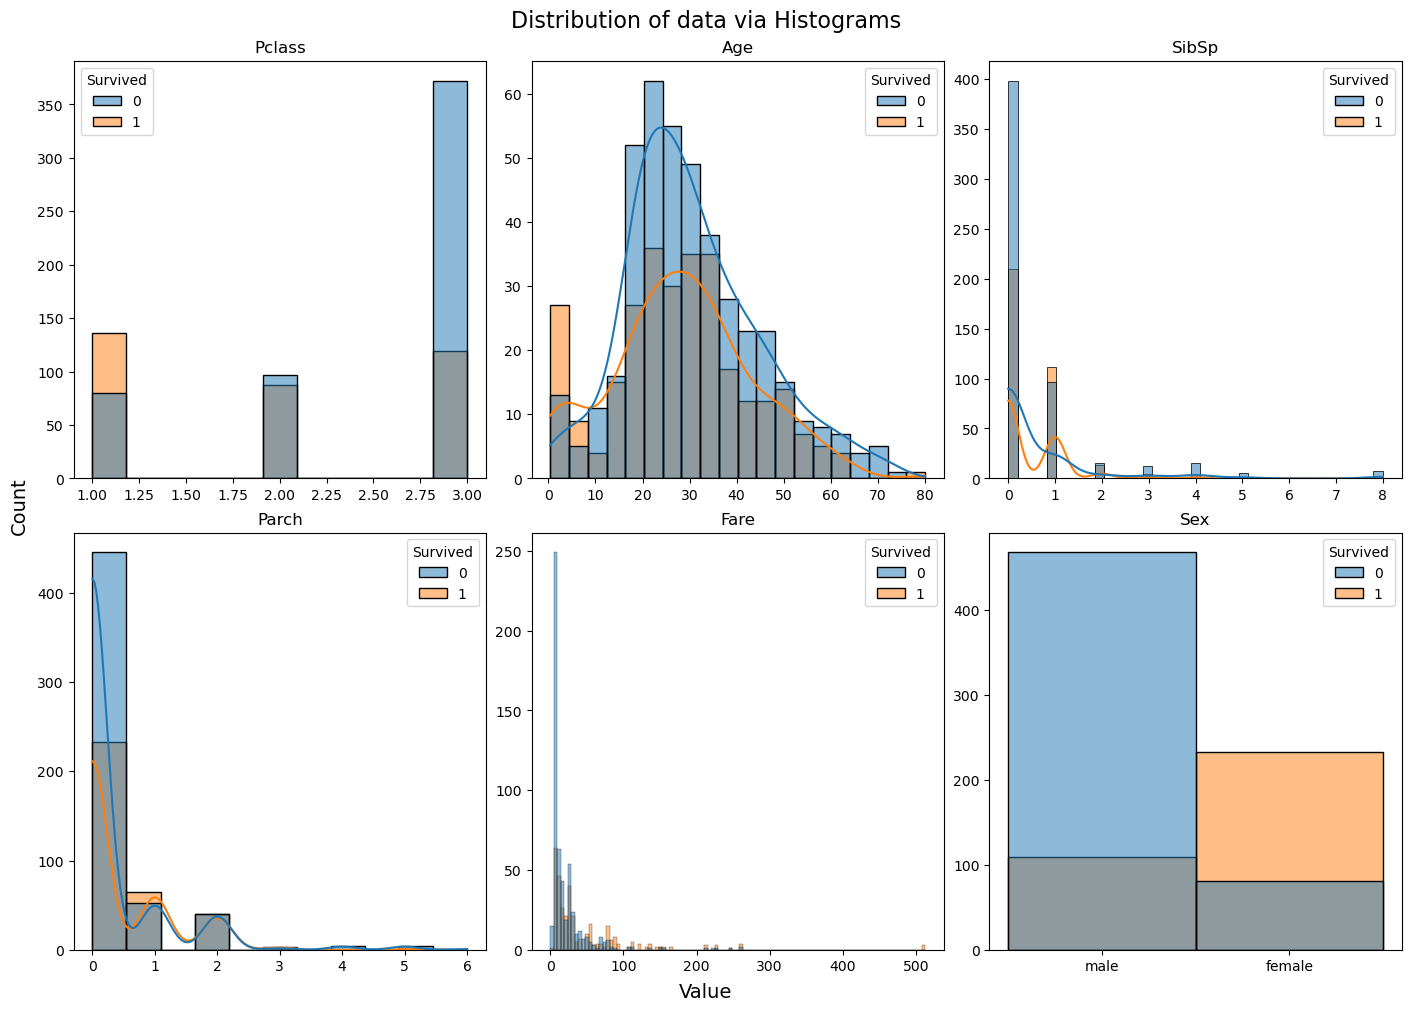

In [28]:
fig, axs = plt.subplots(2, 3, figsize=(14, 10), constrained_layout=True)
index = []
cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']
for i in range(2):
    for j in range(3):
        index.append(axs[i][j])
for i in range(len(cols)):
    if i == 1 or i == 2 or i == 3:
        sns.histplot(
            data=train, x=cols[i], kde=True, ax=index[i], hue=train.columns[1]
        ).set(title=cols[i], xlabel=None, ylabel=None)
    else:
        sns.histplot(
            data=train, x=cols[i], kde=False, ax=index[i], hue=train.columns[1]
        ).set(title=cols[i], xlabel=None, ylabel=None)

fig.supxlabel("Value").set_fontsize(14)
fig.supylabel("Count").set_fontsize(14)
fig.suptitle("Distribution of data via Histograms").set_fontsize(16)

Notice:
- There is a normal distribution for the Age columns.
- Those who got no Sibling, Spouse, Parent and Children tends to survive more.
- Also females tend to survive more than males, and this is because of gentlemen's :)
- People in the 1st class survived more than the 3rd class.

Data Cleaning
- Let's do some basic cleaning.

Se crea la funcion clean la cual imputa los valores faltantes de edad y fare con el valor medio 

In [29]:
def clean(data):
    # Fitting the null values in the Age and the Fare with the mean.
    cols = ['Age', 'Fare']
    for col in cols:
        data[col].fillna(data[col].mean(), inplace=True) 
        
    # Replacing the null values with the most frequent value.
    data.Embarked.fillna(data.Embarked.mode()[0], inplace=True)
    
    return data

In [30]:
from copy import deepcopy
data = deepcopy(train)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
data = clean(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Notice:
- We will handle the missing values in the Cabin column later.

# Feature Engineering

# ransforming Functions

## Names:

In [32]:
# We will use this function to get the title of the people on the titanic like (Captain, Doctor, ...) 
def spliter(name):
    tokens = name.split(', ')
    ppl_kind = tokens[1].split('.')[0]
    
    return ppl_kind

In [36]:
spliter(train['Name'])

AttributeError: 'Series' object has no attribute 'split'

!['Imagen del titanick'](Titanic_cutaway_diagram.png)

In [15]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [16]:
data.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [17]:
# We will have to split from the cabins the letter because they can help us in predicting the survivors as shown in the image.   
def cabin_letter(cabin):
    if str(cabin) == 'nan':
        return 'NA'# Here we are treating the case of null values. We will make them as a category "NA".
    else:
        return str(cabin)[0] # Letters

In [18]:
cabin_letter(data)

' '

In [19]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [20]:
data.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [21]:
# segunda funcion 
# Cabins groups
data['CabinGroup'] = data.Cabin.apply(cabin_letter)
replace = data['CabinGroup'].unique()
data.CabinGroup.replace(to_replace=replace, value=list(range(len(replace))), inplace=True)

In [22]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,6
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1


In [23]:
data['CabinGroup'] = data.Cabin.apply(cabin_letter)

In [24]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,NA
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,NA
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,NA
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,NA
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,C


# Ages:

In [25]:
# As we saw before there is a normal distribution in the column Age. So we will split it to four categories. 
def age_range(age):
    if age <= 20:
        return 0 # Youth
    elif age > 20 and age <= 40:
        return 1 # Adulte
    elif age > 40 and age <= 60:
        return 2 # Old
    else:
        return 3 # Very old

## Passenger loneliness:

In [26]:
# The loneliness of the passenger
def is_alone(id_):
    if id_ in ids.values:
        return 1 # Yes
    else:
        return 0 # No

In [27]:
# Some children travelled only with a nanny, therefore parch=0 for them.
def is_with_nanny(id_):
    #
    if id_ in ids.values:
        return 1 # Yes
    else:
        return 0 # No

## Tickets:

In [28]:
# We can notice that the tickets have two categories some are numeric, others got some letter. 
# Let see if we can get something from this.
def isnum(ticket):
    if ticket.isnumeric():
        return 1 # Yes
    else:
        return 0 # No

## Transforming:

In [29]:
def transform(data):
    global ids
    # Passenger loneliness. 
    ids = data[data.Parch + data.SibSp == 1]['PassengerId']
    data['is_alone'] = data.PassengerId.apply(is_alone)
    
    ids = data[(data.Age <= 15) & (data.Parch == 0)]['PassengerId']
    data['is_with_nanny'] = data.PassengerId.apply(is_with_nanny)
    
    # Handling the age column.
    data['Agerange'] = data.Age.apply(age_range)
    
    # Names titles
    data['Ppl_kind'] = data.Name.apply(spliter)
    replace = data['Ppl_kind'].unique()
    data.Ppl_kind.replace(to_replace=replace, value=list(range(len(replace))), inplace=True)
    
    # Cabins groups
    data['CabinGroup'] = data.Cabin.apply(cabin_letter)
    replace = data['CabinGroup'].unique()
    data.CabinGroup.replace(to_replace=replace, value=list(range(len(replace))), inplace=True)
    
    # Tickets types
    data['TicketType'] = data.Ticket.apply(isnum)
    
    # Changing the categorical columns to numeric
    data.Embarked = data.Embarked.map({'C':0, 'S':1, 'Q':2})
    data['Ppl_kind'] = data['Ppl_kind'].map({0:0, # zero
                                             1:1, 2:1, 3:1, # 1st
                                             4:2, 5:2, # 2nd
                                             6:3, 7:3, 8:3, 9:3, 10:3, 11:3, 12:3, 13:3, 14:3, 15:3, 16:3 # 3rd
                                            })
    data['Agerange'] = data['Agerange'].map({0:0, 1:1, 2:2, 3:2})
    data.Sex = data.Sex.map({'male':0, 'female':1})

    # Dropping useless columns 
    data.drop(['PassengerId', 'Name', 'Cabin', 'Ticket', 'SibSp', 'Parch', 'Age'], axis=1, inplace=True)
    
    return data